In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [2]:
with open('DFDateTime.csv', 'r') as f:
    reader = csv.reader(f)
    data = list(reader)

In [3]:
y = np.array([float(i[-1]) for i in data[1:-1]])

In [4]:
list3elements = []
for i in range(len(y) - 3):
    list3elements.append([float(y[i]), float(y[i+1]), float(y[i+2])])
list3elements = np.array(list3elements)
list3elements

array([[36., 38., 40.],
       [38., 40., 38.],
       [40., 38., 35.],
       ...,
       [32., 37., 34.],
       [37., 34., 16.],
       [34., 16., 28.]])

In [5]:
y = y[3:]

In [6]:
print(len(y))
print(len(list3elements))

7594
7594


In [7]:
print(list3elements[0])
print(y[0])
print(list3elements[-1])
print(y[-1])


[36. 38. 40.]
38.0
[34. 16. 28.]
46.0


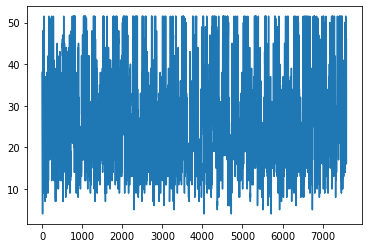

In [8]:
plt.plot(y)
plt.show()

In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Normalization(input_shape=([3]))) 
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add( tf.keras.layers.Dropout(0.2) )
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add( tf.keras.layers.Dropout(0.2) )
model.add(tf.keras.layers.Dense(units=1))
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.01), loss='mean_squared_error', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 3)                7         
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                256       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                        

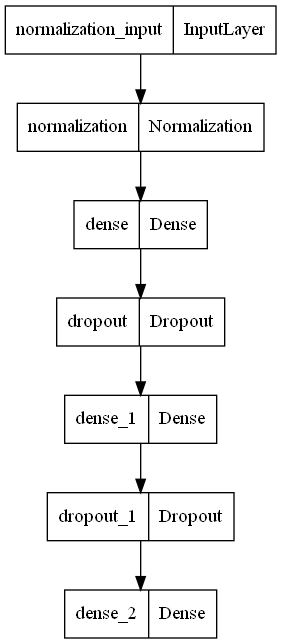

In [4]:
tf.keras.utils.plot_model(model)

In [11]:
history = model.fit(list3elements,y, epochs=10, batch_size=8)

Epoch 1/10
950/950 [==============================] - 3s 3ms/step - loss: 56.4553 - accuracy: 0.0000e+00
Epoch 2/10
950/950 [==============================] - 3s 3ms/step - loss: 56.5108 - accuracy: 0.0000e+00
Epoch 3/10
950/950 [==============================] - 3s 3ms/step - loss: 56.0191 - accuracy: 0.0000e+00
Epoch 4/10
950/950 [==============================] - 3s 3ms/step - loss: 55.9652 - accuracy: 0.0000e+00
Epoch 5/10
950/950 [==============================] - 3s 3ms/step - loss: 56.2350 - accuracy: 0.0000e+00
Epoch 6/10
950/950 [==============================] - 3s 3ms/step - loss: 53.9926 - accuracy: 0.0000e+00
Epoch 7/10
950/950 [==============================] - 3s 3ms/step - loss: 56.0141 - accuracy: 0.0000e+00
Epoch 8/10
950/950 [==============================] - 3s 3ms/step - loss: 56.1012 - accuracy: 0.0000e+00
Epoch 9/10
950/950 [==============================] - 3s 3ms/step - loss: 55.4518 - accuracy: 0.0000e+00
Epoch 10/10
950/950 [==============================] - 

In [ ]:
e = []
for i in range(len(y)):
    e.append((model.predict(list3elements[i]) - y[i])**2)
print(e)

In [15]:
sum = 0
for i in range(len(e)):
    sum = sum + e[i]
print(sum)


[[361936.9]]


Error de 361936.9

In [18]:
model.save('model.h5')

In [3]:
## read the model
model = tf.keras.models.load_model('model.h5')